# TP 2 Descente du Gradient
Dans ce TP, nous aimerions prédire le bénéfice d'une entreprise dans plusieurs ville en nous basant sur les habitant de cette ville.

Pour ce faire, nous étudierons un ensemble de données avec le bénéfice (y) et les caractéristiques des habitants (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [2]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=int)
data.shape

(97, 2)

Dans ces données (data), la première colonne represente la première caractéristique (la population d'une ville x1000), la deuxieme colonne represente le bénéfice (x1000).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [3]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0]))
y = data[:, 1]

Text(0, 0.5, 'Bénéfice x1000')

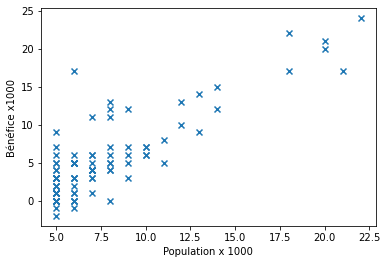

In [4]:
# traçons ces données pour visualisation
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Bénéfice x1000')

# Descente du Gradient : Préparation des fonctions

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [5]:
def computeCostNonVect(X, y, theta):
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte
    # calculer le coût avec et sans vectorisation, 
    # comparer le temps de traitement
    H = []
    for i in range(X.shape[0]):
        H = H + [np.matmul(X[i],theta)[0]]
    somme = 0
    for i in range(len(H)):
        somme = somme + (H[i]-y[i])**2
    return somme/(2*y.shape[0])

In [6]:
def computeCost(X, y, theta):
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte
    
    # calculer le coût avec et sans vectorisation, 
    # comparer le temps de traitement
    return np.power(np.dot(X,theta)-y.reshape((y.shape[0],1)),2).sum()/(2*y.shape[0])
  

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [7]:
def gradientDescent(X, y, theta, alpha, iterations):
    vals = []
    for i in range(iterations):
        vals = vals + [theta[0]+0,theta[1]+0,computeCost(X,y,theta)]
        derivee = derivée(X,y,theta)
        theta[0] = theta[0]-alpha*derivee[0]
        theta[1] = theta[1]-alpha*derivee[1]
    return theta,vals

In [8]:
def derivée(X,y,theta):
    deriv = np.zeros(theta.shape)
    for i in range(deriv.shape[0]):
        deriv[i] = ((np.dot(X,theta)-y.reshape((X.shape[0],1)))*X[:,i]).sum()/y.shape[0]
    return deriv

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [9]:
theta = np.zeros((2, 1))

Calculer le cout initial

In [10]:
initialCost=computeCostNonVect(X, y, theta)
initialCost

29.257731958762886

Appel des la fonction de calcul du gradient

In [11]:
# paramètres
theta = np.zeros((2, 1))
iterations = 1500
alpha = 0.0001
# Appel
theta,val = gradientDescent(X, y, theta, alpha, iterations)
theta

array([[0.08910783],
       [0.68805947]])

Le nouveau cout est  6.131829278151511


Text(0, 0.5, 'Cout')

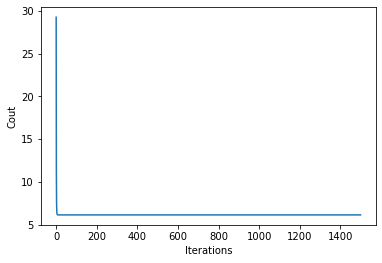

In [12]:
print('Le nouveau cout est ',computeCostNonVect(X, y, theta))
plt.plot(range(iterations),val[2::3])
plt.xlabel('Iterations')
plt.ylabel('Cout')

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

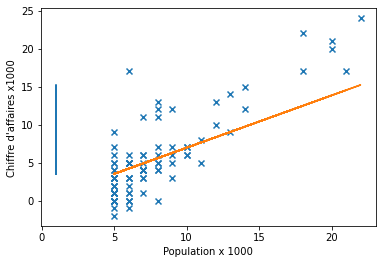

In [13]:
y_pred1=np.matmul(X,theta)
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.plot(X,y_pred1)

Traçage du coût en fonction de theta0 et theta1

Prédire des valeurs de y

In [14]:
# Predire pour une opulation = 35,000 et 70,000
predict1 = np.matmul([1, 3.5],theta)
predict1

array([2.49731597])

In [15]:
predict2 = np.matmul([1, 7],theta);
predict2

array([4.9055241])

# Régression linéaire à plusieurs variables

Proposer, l'aide des fonctions définies precedemment, une regression linéaire lorsque le nombre de descripeurs est supérieur à 1, en utilisant la base d'apprentissage suivante

In [16]:
# données
dataMulti = np.genfromtxt('dataMulti.csv', delimiter=',', dtype=int)
dataMulti.shape

(47, 3)

Pour cette ensemble de données, nous voudrions prédire le prix d'une maison (3ème colonne de dataMulti) à partir de :
- sa supérficie (1ère colonne)
- son nombre de chambres (2ème colonne)

In [17]:
# d'abord créer X et y
intercept=np.ones((dataMulti.shape[0],1))
X= np.column_stack((intercept,dataMulti[:,0:dataMulti.shape[1]-1])).astype(int)
y = dataMulti[:, dataMulti.shape[1]-1]

In [18]:
# redéfinissez vos fonctions de coût si cela est necessaire
#Pas la peine pour ni la fonction avec vectorisation ni celle sans
theta = np.ones((3,1))
computeCost(X, y, theta)

64828234715.65958

Mise à l'échelle des données

In [19]:
Moys = []
for i in range(X.shape[1]):
    Moys = Moys + [X[:,i].mean()]
Xm = np.ones(X.shape)
for i in range(1,X.shape[1]):
    Xm[:,i]=X[:,i]-Moys[i]
print(X[0],'--->',Xm[0])

[   1 2104    3] ---> [  1.         103.31914894  -0.17021277]


Normalisation des données en moyenne = 0

In [20]:
Ects = []
for i in range(X.shape[1]):
    Ects = Ects + [X[:,i].std()]
Xn = np.ones(X.shape)
for i in range(1,X.shape[1]):
    Xn[:,i]=Xm[:,i]/Ects[i]
print(X[0],'--->',Xm[0],'--->',Xn[0])

[   1 2104    3] ---> [  1.         103.31914894  -0.17021277] ---> [ 1.          0.13141542 -0.22609337]


Appliquer la descente du gradient à plusieurs variables

In [21]:
def gradientDescentMulti(X, y, theta, alpha, iterations):
    vals = []
    for i in range(iterations):
        vals = vals + [theta[0]+0,theta[1]+0,computeCost(X,y,theta)]
        derivee = derivée(X,y,theta)
        for i in range(theta.shape[0]):
            theta[i] = theta[i]-alpha*derivee[i]
    return theta

In [22]:
theta = np.zeros((3, 1))
iterations = 1500
alpha = 0.00000001
t2 = time.time()
theta = gradientDescentMulti(Xn, y, theta, alpha, iterations)
t2 = time.time()-t2
theta = np.zeros((3, 1))
t1 = time.time()
theta = gradientDescentMulti(X, y, theta, alpha, iterations)
t1 = time.time()-t1

In [23]:
theta

array([[8.50450437e-02],
       [1.70147990e+02],
       [2.69610883e-01]])

Comparer la descente du gradient avec et sans normalisation
- **Exemple**: voir la difference dans le temps de calcul

In [24]:
print('Le temps d\'execution avec les valeur normalisées ',t2,' est inferieur a celui sans normalisation',t1 )

Le temps d'execution avec les valeur normalisées  0.921802282333374  est inferieur a celui sans normalisation 1.023420810699463


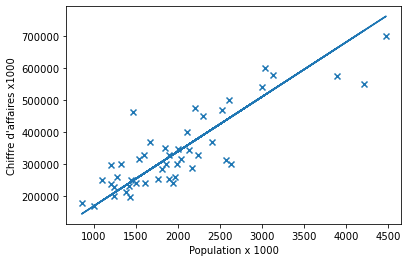

In [25]:
y_pred=np.matmul(X,theta)
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.plot(X[:,1],y_pred)

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [28]:
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0]))
y = data[:, 1]

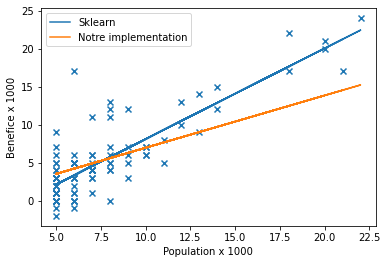

In [29]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

reg.fit(X[:,1].reshape((-1,1)),y.reshape((-1,1)))
y_pred3 = reg.predict(X[:,1].reshape((-1,1)))

plt.scatter(X[:,1], y,marker="x")
plt.plot(X[:,1], y_pred3, label="Sklearn")
plt.plot(X[:,1], y_pred1, label="Notre implementation")
plt.xlabel('Population x 1000')
plt.ylabel('Benefice x 1000')
plt.legend()

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 18 Mars 2022 à 22h


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
def PlotTheta(vals):
    Cout = np.array(vals[2::3]);Cout = Cout.reshape((Cout.shape[0],))
    X,Y = np.array(vals[::3]).reshape((Cout.shape[0],)), np.array(vals[1::3]).reshape((Cout.shape[0],))
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111, projection='3d')
    print(X.shape,'-',Y.shape,'-',Cout.shape)
    ax.plot_trisurf(X,Y, Cout)
    ax.set_xlabel('Theta 0', labelpad=30, fontsize=12)
    ax.set_ylabel('Theta 1', labelpad=30, fontsize=12)
    ax.set_zlabel('Le cout', labelpad=30, fontsize=24, fontweight='bold')

In [ ]:
PlotTheta(val[0:150])